# Overview

## Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable

## Metric

Your score is the percentage of passengers you correctly predict. This is known as accuracy

## Submission File Format

# Data Preparation

Mount Google Drive to This Notebook

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Configure Path to kaggle.json

In [29]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) API Token"

Change Current Working Directory

In [30]:
%cd /content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) Titanic - Machine Learning from Disaster/Datasets

/content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) Titanic - Machine Learning from Disaster/Datasets


Download Titanic Datasets from Kaggle

In [31]:
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


# Data Visualization

## Inspecting the Data Structure

Some Non-Relevant Columns Can be Dropped (Prehaps  

In [50]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There are 891 Passengers in the Training Dataset, But There is Only 714 Age Data Meaning Imputation for Age is Required to Fill the Missing Values.

In [51]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
test = pd.read_csv('test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
train.shape

(891, 12)

In [54]:
test.shape

(418, 11)

Count the Value of Survived(1) and Deceased(0) Pessengers

In [106]:
survived = train['Survived'].value_counts()
survived

0    549
1    342
Name: Survived, dtype: int64

Count the Value of Male and Female Passengers

In [81]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [112]:
sur_sex = pd.crosstab(train['Survived'], train['Sex'])
sur_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


Survive and Decease by Class

In [185]:
sur_cla = pd.crosstab(train['Survived'], train['Pclass'])
sur_cla

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


## Plot Graphs

Survived and Deceased Plot

<BarContainer object of 2 artists>

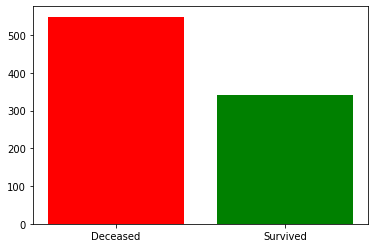

In [153]:
import matplotlib.pyplot as plt
plt.bar(survived.index, survived, color=['r', 'g'], tick_label = ('Deceased', 'Survived'))

Survived and Deceased by Sex

<BarContainer object of 2 artists>

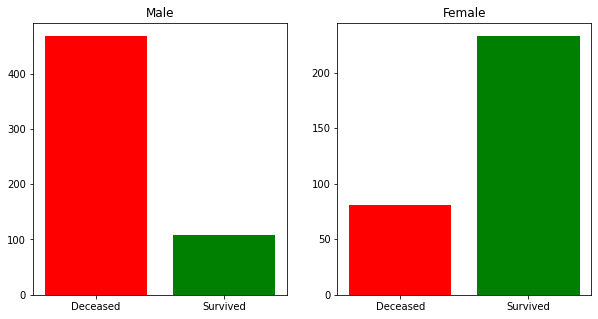

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('Male')
ax[1].set_title('Female')
ax[0].bar(sur_sex.index, sur_sex['male'], color=['r', 'g'], 
          tick_label = ('Deceased', 'Survived'))
ax[1].bar(sur_sex.index, sur_sex['female'], color=['r', 'g'], 
          tick_label = ('Deceased', 'Survived'))



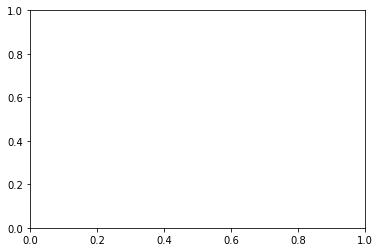

In [188]:
fig, ax = plt.subplots()
ax.bar()